In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessed2.csv')

#Proposed Method - Using TF-IDF as Vectorizer

###Test Dataset Additional Preprocessing (TF-IDF)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['tagging'])

In [ ]:
X = df.stem_str
y = df.label

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X)

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
clf = TruncatedSVD(200)
X_train_clf = clf.fit_transform(X_train_vect)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_clf, y, random_state=42, train_size=0.8,stratify = y)

In [ ]:
X_train.shape,X_val.shape

((480, 200), (120, 200))

##Test Dataset Additional Preprocessing (TF-IDF)

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessedtest.csv')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
test_df['label']= label_encoder.fit_transform(test_df['tagging'])

In [ ]:
test_X = test_df.stem_str
test_y = test_df.label

In [ ]:
X_test_vect = vectorizer.transform(test_X)

In [ ]:
X_test_vect_clf = clf.transform(X_test_vect)

In [ ]:
X_test = X_test_vect_clf

In [ ]:
X_test.shape

(250, 200)

In [ ]:
y_test = test_y

In [ ]:
y_test.shape

(250,)

#Base Model with TF-IDF Vectorizer + PCA

In [ ]:
keras.backend.clear_session()
embedding_vector_features=256
sent_length = 200
voc_size = 5000
model_with_tfidf = Sequential()
model_with_tfidf.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_with_tfidf.add(Bidirectional(LSTM(100)))
model_with_tfidf.add(Dense(2,activation='sigmoid'))
model_with_tfidf.compile(loss='sparse_categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
print(model_with_tfidf.summary())
history_tfidf = model_with_tfidf.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, batch_size = 16)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 256)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              285600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 2)                 402       
                                                                 
Total params: 1,566,002
Trainable params: 1,566,002
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
30/30 [==============================] - 5s 74ms/step - loss: 0.6711 - accuracy: 0.6167 - val_loss: 0.6657 - val_accuracy: 0.6167
Epoch 2/10
30/30 [==============================] - 1s 38ms/step - loss: 0.6660 - accuracy: 0.6208

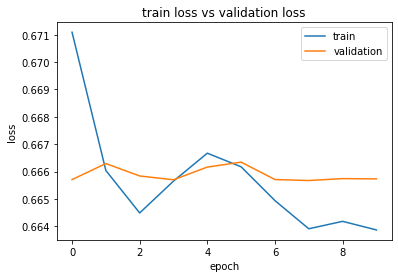

In [ ]:
plt.plot(history_tfidf.history['loss'])
plt.plot(history_tfidf.history['val_loss'])
plt.title('train loss vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

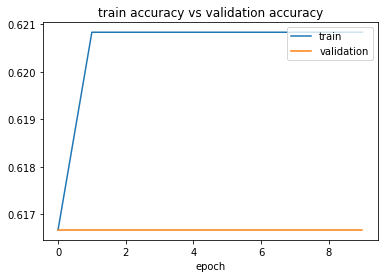

In [ ]:
 plt.plot(history_tfidf.history['accuracy'])
 plt.plot(history_tfidf.history['val_accuracy'])
 plt.title('train accuracy vs validation accuracy')
 plt.xlabel('epoch')
 plt.legend(['train', 'validation'], loc='upper right')
 plt.show() 

In [ ]:
pred_with_tfidf = model_with_tfidf.predict(X_test).argmax(-1)
accuracy_score(y_test,pred_with_tfidf)

8/8 [==============================] - 1s 14ms/step


0.636

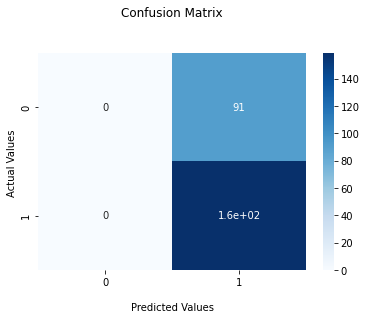

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, pred_with_tfidf), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
print(classification_report(y_test, pred_with_tfidf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        91
           1       0.64      1.00      0.78       159

    accuracy                           0.64       250
   macro avg       0.32      0.50      0.39       250
weighted avg       0.40      0.64      0.49       250



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Original Additional Preprocessing

##Train Dataset Further Additional Preprocessing

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessed2.csv')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['label']= label_encoder.fit_transform(df['tagging'])

In [ ]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
df['stem_str'].head()

0    jakarta jejaring sosial edar informasi sebut l...
1    isu ikan lele kandung sel kanker jejaring soci...
2    nikmat kuliner bahan dasar ikan lele berita su...
3    ikan lele salah makan favorit indonesia harga ...
4    ikan lele bahan makan populer indonesia sebar ...
Name: stem_str, dtype: object

In [ ]:
corpus = []
for i in df['stem_str']:
  corpus.append(i)

In [ ]:
corpus[0]

'jakarta jejaring sosial edar informasi sebut lele ikan jorok suap daging ikan lele kandung 3000 sel kanker juluk ikan jorok rujuk sifat lele doyan konsumsi jenis limbah air artikel viral internet kotor manusia jadi pakan budidaya lele kota haikou china habitat asli lele catfish kenal spesies ikan tangguh ikan lengkap alat napas tambah labirin tahan hidup kondisi air lumpur cemar fakta muncul duga akumulasi racun karsinogen sebab kanker tubuh ikan lele untung ikan lele edar pasar asal alam liar lele dibudidayakan kolam mesti kendali bebas cemar pakan pilih andal limbah popularitas ikan sungut pudar tingkat data menteri laut ikan kkp sebut produksi lele 2013 capai 543 461 ton tingkat 441 217 ton 2012 337 577 ton 2011 konsumsi ikan lele badan pusat statistik bps catat 29 98 kg kapita 22 58 kg kapita 2004 jakarta 6000 lapak pecel lele daftar asosiasi dagang kaki indonesia apkli kandung nutrisi dipungkiri lele sumber protein harga murah riah fakta ikan lele rendah kolesterol tenggelam tudi

In [ ]:
max = 0
for i in df['stemmed']:
  if len(i) > max:
    max = len(i)

In [ ]:
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
sent_length = 200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 3966  920 2334]
 [2524 2118 1236 ... 1265 2324 4448]
 [   0    0    0 ... 3835 3561 4732]
 ...
 [   0    0    0 ... 1054 1640 1558]
 [   0    0    0 ... 1922 2715 4465]
 [   0    0    0 ... 1054 1640 1558]]


In [ ]:
len(embedded_docs),df['label'].shape

(600, (600,))

In [ ]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  214, 3465, 4640, 4090, 1578, 3857, 1721, 4343,  727,
       4441,  980, 4343, 1721, 4728, 2884, 4442, 3835, 3880, 4343,  727,
       3125, 2789, 1721, 1905, 2899, 3034, 2678, 4073, 1406, 3437, 2118,
       1236, 4732, 1156, 3565, 2876, 1721, 1854, 1789, 1697, 1659, 1224,
       1721, 4319, 2887, 4764, 4343, 4105, 4343,  929, 4837, 2389, 3749,
        838, 4321, 3483, 2934, 4073, 1604, 4897, 3607, 1954,  995, 1326,
       1059,  781, 3979, 3835, 3561, 4343, 1721, 2964, 4343, 1721, 4090,
       1845,  846, 3067, 4767, 1721,  313, 3169, 3216, 2986, 3506, 4897,
       3565,  456, 3847, 2678, 2611, 4343, 4201, 1754, 1548, 4434, 4305,
       2335, 4343, 4367, 3857,   24, 1721,  534, 4787, 3723, 3417, 2916,
       1548,  686, 4091, 2916, 3387, 3347, 2467, 2916, 4443, 2899, 4343,
       1721,  644, 4574, 1218, 4593, 3631, 3936, 1011, 2128, 2419, 4143,
       3648, 2128, 2419, 1222,  214,  880, 1271,  4

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

In [ ]:
X_final.shape,y_final.shape

((600, 200), (600,))

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=28,stratify = y_final)

In [ ]:
y_train.shape

(480,)

####Test Dataset Further Additional Preprocessing

In [ ]:
test_df = pd.read_csv('https://raw.githubusercontent.com/rionaldoalviansa/Deep-Learning/main/preprocessedtest.csv')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
test_df['label']= label_encoder.fit_transform(test_df['tagging'])

In [ ]:
test_corpus = []
for i in test_df['stem_str']:
  test_corpus.append(i)

In [ ]:
max = 0
for i in test_df['stemmed']:
  if len(i) > max:
    max = len(i)

In [ ]:
voc_size = 5000
onehot_repr=[one_hot(words,voc_size)for words in test_corpus] 

In [ ]:
sent_length = 200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [ ]:
import numpy as np
X_test=np.array(embedded_docs)
y_test=np.array(test_df['label'])

#Tuning with Randomized Search from Keras Tuner

In [ ]:
pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from hyperopt import hp

In [ ]:
pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
import os

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 34.2 MB/s 
     |████████████████████████████████| 1.6 MB 45.0 MB/s 


In [ ]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
import warnings

In [ ]:
# embedding_vector_features=512
def build_model(hp):
  model = keras.Sequential()
  model.add(Embedding(voc_size,hp.Choice('evf_layer', [64, 128, 256,512]),input_length=sent_length))
  model.add(Bidirectional(LSTM(hp.Choice('bi-lstm', [64, 128, 256,512]))))
  model.add(keras.layers.Dropout(hp.Choice('dropout_units', [0.3, 0.2, 0.1, 0.5])))
  for i in range(hp.Choice('dense_total', range(1,5))):
      model.add(keras.layers.Dense(hp.Choice('units', [64, 128, 256, 512]), activation='relu'))
  model.add(keras.layers.Dense(2, activation='sigmoid'))
  model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
import keras_tuner
import kerastuner as kt

<ipython-input-43-298be334fb07>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
hp = kt.HyperParameters()
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    hyperparameters=hp,
    max_trials=128)

In [ ]:
tuning_attempt = tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size = 16)

Trial 128 Complete [00h 00m 22s]
val_accuracy: 0.7416666746139526

Best val_accuracy So Far: 0.800000011920929
Total elapsed time: 00h 29m 41s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
print(best_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                        

#Final Model

In [ ]:
keras.backend.clear_session()
final_model = keras.Sequential()
final_model.add(Embedding(voc_size,128,input_length=sent_length))
final_model.add(Bidirectional(LSTM(64)))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(128, activation='relu'))
final_model.add(keras.layers.Dense(128, activation='relu'))
final_model.add(keras.layers.Dense(2, activation='sigmoid'))
final_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
print(final_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                        

In [ ]:
final_history = final_model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs=10, batch_size = 16)

Epoch 1/10
30/30 [==============================] - 5s 67ms/step - loss: 0.6743 - accuracy: 0.5979 - val_loss: 0.6441 - val_accuracy: 0.6167
Epoch 2/10
30/30 [==============================] - 1s 21ms/step - loss: 0.5974 - accuracy: 0.6542 - val_loss: 0.5293 - val_accuracy: 0.7417
Epoch 3/10
30/30 [==============================] - 1s 21ms/step - loss: 0.3948 - accuracy: 0.8667 - val_loss: 0.4863 - val_accuracy: 0.8000
Epoch 4/10
30/30 [==============================] - 1s 21ms/step - loss: 0.2011 - accuracy: 0.9333 - val_loss: 0.7767 - val_accuracy: 0.7333
Epoch 5/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1375 - accuracy: 0.9438 - val_loss: 0.6929 - val_accuracy: 0.7417
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.1238 - accuracy: 0.9542 - val_loss: 0.6921 - val_accuracy: 0.7250
Epoch 7/10
30/30 [==============================] - 1s 22ms/step - loss: 0.1229 - accuracy: 0.9521 - val_loss: 0.6799 - val_accuracy: 0.7333
Epoch 8/10
30

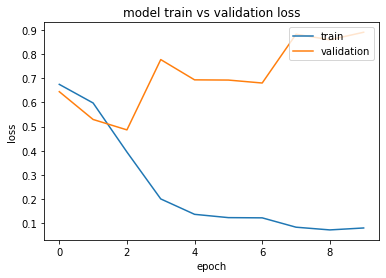

In [ ]:
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

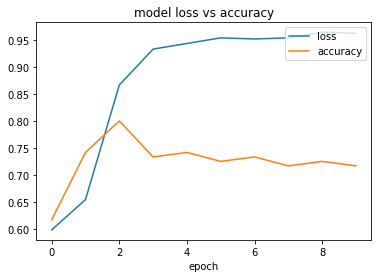

In [ ]:
 plt.plot(final_history.history['accuracy'])
 plt.plot(final_history.history['val_accuracy'])
 plt.title('model loss vs accuracy')
 plt.xlabel('epoch')
 plt.legend(['loss', 'accuracy'], loc='upper right')
 plt.show() 

>Graph di atas ada salah title Pak, harusnya train accuracy vs validation accuracy

In [ ]:
final_pred = final_model.predict(X_test).argmax(-1)
accuracy_score(y_test,final_pred)

8/8 [==============================] - 1s 9ms/step


0.928

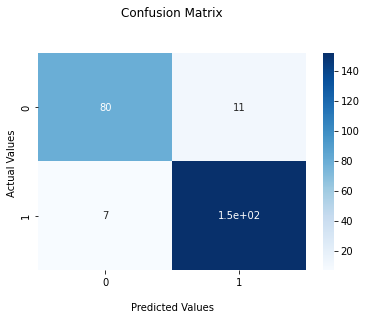

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test, final_pred), annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [ ]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        91
           1       0.93      0.96      0.94       159

    accuracy                           0.93       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.93      0.93       250

